# HW2

In [1]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def get_data(exchange, token):
    req = requests.get(f'https://api.cryptowat.ch/markets/{exchange}/{token}usd/ohlc', 
                       params={'periods': '3600', 'after': str(int(pd.Timestamp('2021-11-22').timestamp()))})
    df = pd.DataFrame(data=req.json()['result']['3600'], columns=['ts', 'open', 'high', 'low', 'close', 'volume', 'volumeUSD'])
    df['ts'] = pd.to_datetime(df['ts'], unit='s')
    df['token'] = token
    return df

In [3]:
tokens = ['ETH', 'SOL', 'AVAX', 'USDT', 'FLOW']

In [4]:
dfs = [get_data('coinbase-pro', token) for token in tokens[:-1]]
dfs.append(get_data('Kraken', tokens[-1]))

In [5]:
dfs_dict = {}
for i in range(len(tokens)):
    dfs_dict[tokens[i]] = dfs[i].set_index('ts')

## Q1
Get the time series for the following cryptocurrencies from cryptowat.ch starting from 2021-11-22, hourly data
<br>ETH, SOL, AVAX, USDT, FLOW

In [92]:
df = pd.concat(dfs).set_index('ts')
df.head()

,open,high,low,close,volume,volumeUSD,token
ts,,,,,,,
2021-11-22 00:00:00,4317.98,4342.24,4246.07,4262.99,7262.562789,3.123077e+07,ETH
2021-11-22 01:00:00,4263.04,4270.34,4212.45,4234.37,8437.946084,3.574586e+07,ETH
2021-11-22 02:00:00,4234.87,4246.72,4171.17,4217.89,9259.725370,3.895639e+07,ETH
2021-11-22 03:00:00,4217.88,4223.48,4163.58,4193.47,9259.899519,3.882032e+07,ETH
2021-11-22 04:00:00,4192.95,4213.59,4147.00,4168.35,7934.546906,3.315476e+07,ETH


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2780 entries, 2021-11-22 00:00:00 to 2021-12-15 03:00:00
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   open       2780 non-null   float64
 1   high       2780 non-null   float64
 2   low        2780 non-null   float64
 3   close      2780 non-null   float64
 4   volume     2780 non-null   float64
 5   volumeUSD  2780 non-null   float64
 6   token      2780 non-null   object 
dtypes: float64(6), object(1)
memory usage: 173.8+ KB


In [94]:
df.describe()

,open,high,low,close,volume,volumeUSD
count,2780.000000,2780.000000,2780.000000,2780.000000,2.780000e+03,2.780000e+03
mean,908.011929,914.437991,900.941867,907.789589,7.544109e+05,1.235222e+07
std,1664.779627,1675.971232,1652.518751,1664.458099,1.983394e+06,2.072824e+07
min,1.000100,1.000200,0.999100,1.000100,4.669108e+01,8.382021e+02
25%,9.402500,9.447750,9.331000,9.381750,9.698283e+03,1.675200e+06
50%,106.065000,107.460000,103.830000,105.860000,3.884747e+04,5.398295e+06
75%,212.715000,214.743250,211.037500,212.623750,1.047311e+05,1.399893e+07
max,4772.600000,4784.500000,4722.020000,4772.600000,3.282850e+07,3.702769e+08


In [95]:
df['token'].value_counts()

ETH     556
SOL     556
AVAX    556
USDT    556
FLOW    556
Name: token, dtype: int64

## Q2
Get the total USD volume traded for each token in a dataframe, sorted from highest volume to lowest volume

In [96]:
total_volume_usd = df.groupby('token').agg({'volumeUSD': np.sum}).sort_values(by='volumeUSD', ascending=False).rename(columns={'volumeUSD': 'totalVolumeUSD'})
total_volume_usd

,totalVolumeUSD
token,
ETH,2.162447e+10
SOL,7.082916e+09
AVAX,3.527094e+09
USDT,2.015904e+09
FLOW,8.877511e+07


In [97]:
# alternative method
df.groupby('token')['volumeUSD'].agg([('totalVolumeUSD', np.sum)]).sort_values(by='totalVolumeUSD', ascending=False)

,totalVolumeUSD
token,
ETH,2.162447e+10
SOL,7.082916e+09
AVAX,3.527094e+09
USDT,2.015904e+09
FLOW,8.877511e+07


## Q3
Add a column that calculates the close price ratio between ETH and SOL for each hour (i.e. close price of ETH / close price of SOL for each period)

In [98]:
close_price_ratio = dfs_dict['ETH']['close'] / dfs_dict['SOL']['close']
df.insert(4, 'closePriceRatio', close_price_ratio)
df.sort_index().head(15)

,open,high,low,close,closePriceRatio,volume,volumeUSD,token
ts,,,,,,,,
2021-11-22 00:00:00,4317.9800,4342.2400,4246.0700,4262.9900,18.471694,7.262563e+03,3.123077e+07,ETH
2021-11-22 00:00:00,230.4830,234.6880,228.8050,230.7850,18.471694,9.353180e+04,2.172284e+07,SOL
2021-11-22 00:00:00,13.8870,14.1690,13.8870,14.1500,18.471694,2.326138e+04,3.274755e+05,FLOW
2021-11-22 00:00:00,131.6900,133.7900,127.7000,128.6700,18.471694,9.686748e+04,1.267080e+07,AVAX
2021-11-22 00:00:00,1.0010,1.0017,1.0009,1.0012,18.471694,9.987681e+06,9.999090e+06,USDT
2021-11-22 01:00:00,4263.0400,4270.3400,4212.4500,4234.3700,18.736150,8.437946e+03,3.574586e+07,ETH
2021-11-22 01:00:00,230.7520,232.2690,225.0520,226.0000,18.736150,8.884100e+04,2.017188e+07,SOL
2021-11-22 01:00:00,14.0530,14.4530,13.5430,13.6210,18.736150,2.910879e+04,4.117675e+05,FLOW
2021-11-22 01:00:00,1.0012,1.0014,1.0012,1.0013,18.736150,7.766318e+06,7.775823e+06,USDT


## Q4
Change the name of the volume and volumeUSD columns to volumeBase and volumeTerm

In [109]:
df.rename(columns={'volume': 'volumeBase', 'volumeUSD': 'volumeTerm'}, inplace=True)
df.head()

,open,high,low,close,closePriceRatio,volumeBase,volumeTerm,token
ts,,,,,,,,
2021-11-22 00:00:00,4317.98,4342.24,4246.07,4262.99,18.471694,7262.562789,3.123077e+07,ETH
2021-11-22 01:00:00,4263.04,4270.34,4212.45,4234.37,18.736150,8437.946084,3.574586e+07,ETH
2021-11-22 02:00:00,4234.87,4246.72,4171.17,4217.89,18.577985,9259.725370,3.895639e+07,ETH
2021-11-22 03:00:00,4217.88,4223.48,4163.58,4193.47,18.794937,9259.899519,3.882032e+07,ETH
2021-11-22 04:00:00,4192.95,4213.59,4147.00,4168.35,18.891059,7934.546906,3.315476e+07,ETH


## Q5
Create a fat table indexed by the timestamp, and each column is the close price of each token (i.e. this should be a table of 200 rows and 5 columns)

In [110]:
table_close_price = pd.pivot_table(df, index='ts', columns='token', values='close')
table_close_price

token,AVAX,ETH,FLOW,SOL,USDT
ts,,,,,
2021-11-22 00:00:00,128.67,4262.99,14.150,230.785,1.0012
2021-11-22 01:00:00,134.85,4234.37,13.621,226.000,1.0013
2021-11-22 02:00:00,132.54,4217.89,13.753,227.037,1.0012
2021-11-22 03:00:00,133.38,4193.47,13.652,223.117,1.0011
2021-11-22 04:00:00,136.29,4168.35,13.581,220.652,1.0009
...,...,...,...,...,...
2021-12-14 23:00:00,86.08,3840.49,8.641,158.950,1.0005
2021-12-15 00:00:00,87.26,3860.74,8.662,161.380,1.0004
2021-12-15 01:00:00,89.05,3851.02,8.641,161.200,1.0004


## Q6
calculate the hour by hour log return of the close price of each token (return is calculated by np.log(price_t / price_{t-1}))

In [111]:
log_return = pd.DataFrame()
for token in tokens:
    log_return[token] = np.log(dfs_dict[token]['close'] / dfs_dict[token]['close'].shift(1)).dropna()
log_return

,ETH,SOL,AVAX,USDT,FLOW
ts,,,,,
2021-11-22 01:00:00,-0.006736,-0.020952,0.046912,0.0001,-0.038102
2021-11-22 02:00:00,-0.003900,0.004578,-0.017279,-0.0001,0.009644
2021-11-22 03:00:00,-0.005806,-0.017417,0.006318,-0.0001,-0.007371
2021-11-22 04:00:00,-0.006008,-0.011109,0.021583,-0.0002,-0.005214
2021-11-22 05:00:00,-0.002472,-0.015161,-0.031832,-0.0001,-0.014014
...,...,...,...,...,...
2021-12-14 23:00:00,-0.003200,-0.010078,0.031989,0.0001,-0.003235
2021-12-15 00:00:00,0.005259,0.015172,0.013615,-0.0001,0.002427
2021-12-15 01:00:00,-0.002521,-0.001116,0.020306,0.0000,-0.002427


In [112]:
# alternative method
log_return2 = np.log(df.groupby('token')[['close']].shift(0) / df.groupby('token')[['close']].shift(1))
log_return2 = log_return2.assign(token=df['token'])
pd.pivot_table(log_return2.dropna(), index='ts', columns='token', values='close')

token,AVAX,ETH,FLOW,SOL,USDT
ts,,,,,
2021-11-22 01:00:00,0.046912,-0.006736,-0.038102,-0.020952,0.0001
2021-11-22 02:00:00,-0.017279,-0.003900,0.009644,0.004578,-0.0001
2021-11-22 03:00:00,0.006318,-0.005806,-0.007371,-0.017417,-0.0001
2021-11-22 04:00:00,0.021583,-0.006008,-0.005214,-0.011109,-0.0002
2021-11-22 05:00:00,-0.031832,-0.002472,-0.014014,-0.015161,-0.0001
...,...,...,...,...,...
2021-12-14 23:00:00,0.031989,-0.003200,-0.003235,-0.010078,0.0001
2021-12-15 00:00:00,0.013615,0.005259,0.002427,0.015172,-0.0001
2021-12-15 01:00:00,0.020306,-0.002521,-0.002427,-0.001116,0.0000


## Q7
[Stretch] calculate the correlation of the tokens using the table above

In [113]:
corr_log_return = log_return.corr()
corr_log_return

,ETH,SOL,AVAX,USDT,FLOW
ETH,1.000000,0.743574,0.641885,-0.119323,0.565433
SOL,0.743574,1.000000,0.621984,0.100470,0.451796
AVAX,0.641885,0.621984,1.000000,-0.017756,0.390549
USDT,-0.119323,0.100470,-0.017756,1.000000,-0.193105
FLOW,0.565433,0.451796,0.390549,-0.193105,1.000000


## Q8
[Stretch] visualize the correlation in a matplpotlib plot

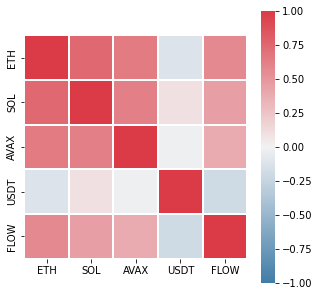

In [114]:
%matplotlib inline
f, ax = plt.subplots(1, figsize=(5, 5))
sns.heatmap(corr_log_return, ax=ax, vmin=-1, vmax=1, square=True, linewidth=.01, linecolor='white', cbar=True, cmap=sns.diverging_palette(240, 10, as_cmap=True))
plt.show()